In [1]:
# Visualize the Wandb Results

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib

from datetime import datetime
import dataframe_image as dfi

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Get the results file
CSV_FILE = '/Users/kimathikaai/Downloads/NIPS2024 - wandb-results-v1.csv'
# Get the pandas dataframe
df = pd.read_csv(CSV_FILE)
print(f"{len(df) = }, {df.columns = }")
df

len(df) = 468, df.columns = Index(['Name', 'ID', 'State', 'hyper-parameters.pretrain_path',
       'hyper-parameters.pretrain_type', 'hyper-parameters.img_dirs',
       'hyper-parameters.epochs', 'hyper-parameters.train_data_ratio',
       'hyper-parameters.seed', 'test_BinaryJaccardIndex',
       'test_BinaryF1Score', 'test_BinaryPrecision', 'test_BinaryRecall',
       'test_Dice'],
      dtype='object')


,Name,ID,State,hyper-parameters.pretrain_path,hyper-parameters.pretrain_type,hyper-parameters.img_dirs,hyper-parameters.epochs,hyper-parameters.train_data_ratio,hyper-parameters.seed,test_BinaryJaccardIndex,test_BinaryF1Score,test_BinaryPrecision,test_BinaryRecall,test_Dice
0,240818203604-ETIS-LaribPolypDB-BYOL-R1.0-S2-IM...,j1w37rzr,finished,/mnt/pub1/ssl-pretraining/logs/240818160809-pr...,BYOL,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,1.0,2,0.630445,0.773341,NaN,NaN,0.773341
1,240818203256-ETIS-LaribPolypDB-BYOL-R1.0-S1-IM...,h27jgv4j,finished,/mnt/pub1/ssl-pretraining/logs/240818160809-pr...,BYOL,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,1.0,1,0.673100,0.804614,NaN,NaN,0.804614
2,240818202952-ETIS-LaribPolypDB-BYOL-R1.0-S0-IM...,40c5gm88,finished,/mnt/pub1/ssl-pretraining/logs/240818160809-pr...,BYOL,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,1.0,0,0.620949,0.766155,NaN,NaN,0.766155
3,240818202724-ETIS-LaribPolypDB-BYOL-R0.6-S2-IM...,txx8tuuh,finished,/mnt/pub1/ssl-pretraining/logs/240818160809-pr...,BYOL,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.6,2,0.534400,0.696559,NaN,NaN,0.696559
4,240818202453-ETIS-LaribPolypDB-BYOL-R0.6-S1-IM...,uat8lh8h,finished,/mnt/pub1/ssl-pretraining/logs/240818160809-pr...,BYOL,"[""/mnt/pub1/ssl-pretraining/data/ETIS-LaribPol...",100,0.6,1,0.570587,0.726591,NaN,NaN,0.726591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,240903024250-Kvasir-SEG-CP2-R0.6-S1-POLYP,zh6a1h1n,finished,/mnt/pub1/ssl-pretraining/logs/240816040556-pr...,PretrainType.CP2,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,0.6,1,0.768083,0.868831,0.873402,0.864309,0.868831
464,240903023537-Kvasir-SEG-CP2-R0.6-S0-POLYP,xffpqqlc,finished,/mnt/pub1/ssl-pretraining/logs/240816040556-pr...,PretrainType.CP2,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,0.6,0,0.768489,0.869091,0.869972,0.868213,0.869091
465,240903023040-Kvasir-SEG-CP2-R0.3-S2-POLYP,bkr65o8m,finished,/mnt/pub1/ssl-pretraining/logs/240816040556-pr...,PretrainType.CP2,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,0.3,2,0.777152,0.874604,0.915642,0.837086,0.874604
466,240903022549-Kvasir-SEG-CP2-R0.3-S1-POLYP,iybw8q9l,finished,/mnt/pub1/ssl-pretraining/logs/240816040556-pr...,PretrainType.CP2,"[""/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Im...",100,0.3,1,0.767652,0.868555,0.863327,0.873848,0.868555


In [29]:
# Create the global pivot table. Counts should be 3 for 3 seeds
def get_pivot(data):
    return pd.pivot_table(
        data=data, 
        values=['test_BinaryJaccardIndex'], 
        index=['hyper-parameters.train_data_ratio', 'hyper-parameters.pretrain_type', 'hyper-parameters.pretrain_path'], 
        columns=['hyper-parameters.img_dirs'], aggfunc=["mean","std", "count"], margins=True)
    
def get_ratio_pivot(data):
    return pd.pivot_table(
        data=data, 
        values=['test_BinaryJaccardIndex'], 
        index=['hyper-parameters.pretrain_type', 'hyper-parameters.pretrain_path'], 
        columns=['hyper-parameters.train_data_ratio'], aggfunc=["mean","std", "count"], margins=True).style.background_gradient()

get_pivot(df)

mean  \
                                                                                                                                                   test_BinaryJaccardIndex   
hyper-parameters.img_dirs                                                                                           ["/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/Images"]   
hyper-parameters.train_data_ratio hyper-parameters.pretrain_type hyper-parameters.pretrain_path                                                                              
0.3                               BYOL                           /mnt/pub1/ssl-pretraining/logs/240818160809-pre...                                           0.687694       
                                  CP2                            /mnt/pub1/ssl-pretraining/logs/240818082053-pre...                                           0.712598       
                                  MOCO                           /mnt/pub1/ssl-pretraining/logs/240818114824-pre...                                           0.705041       
                                  PROPOSED-OLD                   /mnt/pub1/ssl-pretraining/logs/240817220102-pre...                                           0.725937       
                                  PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.699948       
                                  PretrainType.BYOL-OLD          /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.729244       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.710403       
                                  PretrainType.CP2-OLD           /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.696590       
                                  PretrainType.MOCO              /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.731861       
                                  PretrainType.MOCO-OLD          /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.735725       
                                  PretrainType.NONE              No-pretraining                                                                               0.726962       
                                  PretrainType.PIXPRO            /mnt/pub1/ssl-pretraining/logs/240902172247-Pix...                                           0.437286       
                                  PretrainType.PROPOSED          /mnt/pub1/ssl-pretraining/logs/240902223803-pre...                                           0.713712       
0.6                               BYOL                           /mnt/pub1/ssl-pretraining/logs/240818160809-pre...                                           0.711850       
                                  CP2                            /mnt/pub1/ssl-pretraining/logs/240818082053-pre...                                           0.704634       
                                  MOCO                           /mnt/pub1/ssl-pretraining/logs/240818114824-pre...                                           0.731569       
                                  PROPOSED-OLD                   /mnt/pub1/ssl-pretraining/logs/240817220102-pre...                                           0.699681       
                                  PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.710917       
                                  PretrainType.BYOL-OLD          /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.744004       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.7344

In [5]:
df['hyper-parameters.pretrain_path'].unique()

array(['/mnt/pub1/ssl-pretraining/logs/240818160809-pretrain-BYOL-IMAGENET/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240818114824-pretrain-MOCO-IMAGENET/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240818082053-pretrain-CP2-IMAGENET/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240817220102-pretrain-PROPOSED-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240816170945-pretrain-BYOL-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240816115548-pretrain-MOCO-POLYP/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240816040556-pretrain-CP2-POLYP/checkpoint.ckpt',
       'No-pretraining',
       '/mnt/pub1/ssl-pretraining/logs/240902172247-PixPro/checkpoint.ckpt',
       '/mnt/pub1/ssl-pretraining/logs/240902223803-pretrain-PROPOSED-POLYP/checkpoint.ckpt'],
      dtype=object)

### Data Efficiency % with Polyp Pre-Training

In [33]:
data = df.loc[
    (df['hyper-parameters.train_data_ratio'].isin([1]))
    &(df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False)
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
    # &(df['hyper-parameters.img_dirs'].isin(
    #     [
    #         '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]', 
    #         '["/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/Images"]',
    #         '["/mnt/pub1/ssl-pretraining/data/ETIS-LaribPolypDB/Images"]'
    #     ]))
]
get_pivot(data).style.background_gradient()

In [30]:
# Using groupby
dataset = '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]'
method = 'PretrainType.BYOL'
data = df.loc[
    (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
    # &(df['hyper-parameters.pretrain_type']==method)
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
    # &(df['hyper-parameters.img_dirs']==dataset)
]
pivot = get_ratio_pivot(data)
pivot

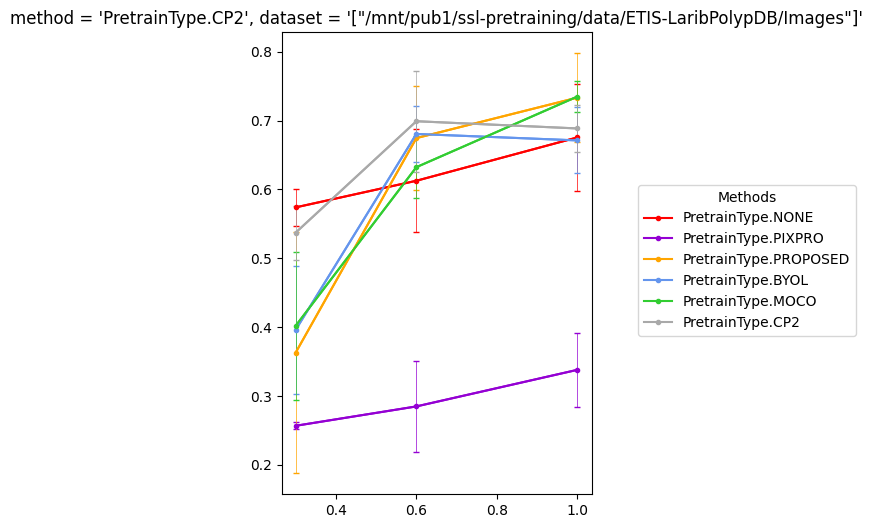

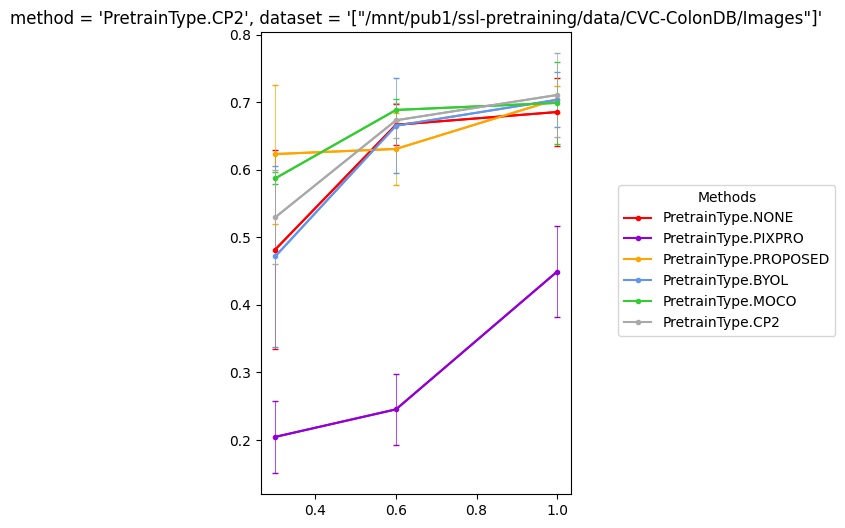

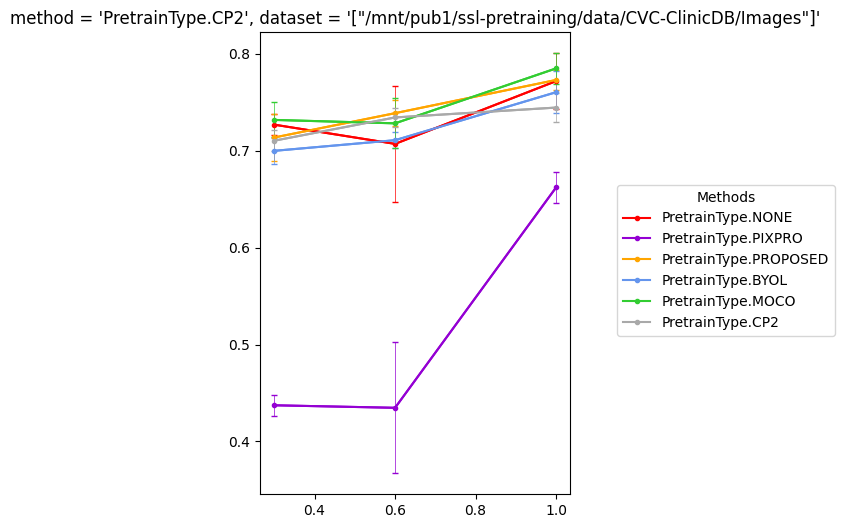

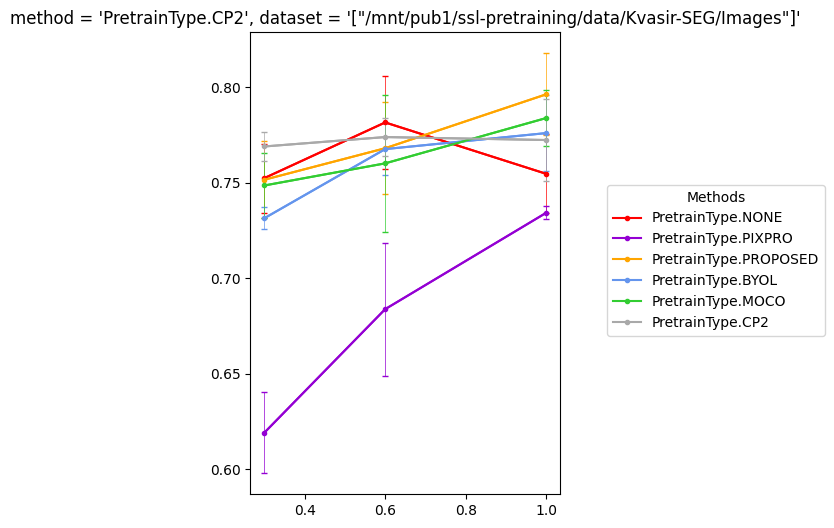

In [16]:
# Plot the pivot table
data = df.loc[
    (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
    &(df['hyper-parameters.pretrain_type'].str.contains('OLD')==False) # Ignore old results
]
datasets = data['hyper-parameters.img_dirs'].unique()
methods = data['hyper-parameters.pretrain_type'].unique()
BASE_COLORS = [
    "red",
    "darkviolet",
    "orange",
    "cornflowerblue",
    "limegreen",
    "darkgrey",
    "pink",
    'blue',
    'limegreen',
    'magenta'
]

# Iterate through each dataset
for dataset in datasets:
    fig, ax = plt.subplots(figsize=(4,6))
    for i, method in enumerate(methods):
        # print(f"{dataset = }, {method = }")
        pivot = get_pivot(
            df.loc[
                (df['hyper-parameters.pretrain_path'].str.contains('IMAGENET')==False) # Ignore imagenet pre-training
                &(df['hyper-parameters.pretrain_type']==method)
                &(df['hyper-parameters.img_dirs']==dataset)
            ]
        )
        values = pivot.values
        # print(f"{values = }")
        index = pivot.index.values
        columns = pivot.columns.values

        ious = values[:,0]
        std = values[:,1]
        counts = values[:,2]
        ratios = [x[0] for x in index]
        assert counts[0] == 3

        # plot
        ax.errorbar(ratios, ious, yerr=std, color=BASE_COLORS[i], elinewidth=0.5, capsize=2, zorder=5)
        ax.plot(ratios, ious, label=method, zorder=10,c=BASE_COLORS[i], marker='.')
        ax.set_title(f"{method = }, {dataset = }")
    # Legend
    fig.legend(
        title="Methods",
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

### Save

In [9]:
datetime.now().strftime('%d%m%Y%H%M%S')

'03092024123730'

In [10]:
# help(dfi.export)

In [11]:
if True:
    now = datetime.now().strftime('%d%m%Y%H%M%S')
    # now = '03092024092120'
    df.to_csv(f"wandb-{now}.csv", index=False)
    dfi.export(
        get_pivot(df), 
        f"pivot-{now}.png",
        max_rows=-1,
        max_cols=-1,
        dpi=None,
        # table_conversion='matplotlib'
    )
get_pivot(df)

mean  \
                                                                                                                                                   test_BinaryJaccardIndex   
hyper-parameters.img_dirs                                                                                           ["/mnt/pub1/ssl-pretraining/data/CVC-ClinicDB/Images"]   
hyper-parameters.train_data_ratio hyper-parameters.pretrain_type hyper-parameters.pretrain_path                                                                              
0.3                               BYOL                           /mnt/pub1/ssl-pretraining/logs/240818160809-pre...                                           0.687694       
                                  CP2                            /mnt/pub1/ssl-pretraining/logs/240818082053-pre...                                           0.712598       
                                  MOCO                           /mnt/pub1/ssl-pretraining/logs/240818114824-pre...                                           0.705041       
                                  PROPOSED-OLD                   /mnt/pub1/ssl-pretraining/logs/240817220102-pre...                                           0.725937       
                                  PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.699948       
                                  PretrainType.BYOL-OLD          /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.729244       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.710403       
                                  PretrainType.CP2-OLD           /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.696590       
                                  PretrainType.MOCO              /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.731861       
                                  PretrainType.MOCO-OLD          /mnt/pub1/ssl-pretraining/logs/240816115548-pre...                                           0.735725       
                                  PretrainType.NONE              No-pretraining                                                                               0.726962       
                                  PretrainType.PIXPRO            /mnt/pub1/ssl-pretraining/logs/240902172247-Pix...                                           0.437286       
                                  PretrainType.PROPOSED          /mnt/pub1/ssl-pretraining/logs/240902223803-pre...                                           0.713712       
0.6                               BYOL                           /mnt/pub1/ssl-pretraining/logs/240818160809-pre...                                           0.711850       
                                  CP2                            /mnt/pub1/ssl-pretraining/logs/240818082053-pre...                                           0.704634       
                                  MOCO                           /mnt/pub1/ssl-pretraining/logs/240818114824-pre...                                           0.731569       
                                  PROPOSED-OLD                   /mnt/pub1/ssl-pretraining/logs/240817220102-pre...                                           0.699681       
                                  PretrainType.BYOL              /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.710917       
                                  PretrainType.BYOL-OLD          /mnt/pub1/ssl-pretraining/logs/240816170945-pre...                                           0.744004       
                                  PretrainType.CP2               /mnt/pub1/ssl-pretraining/logs/240816040556-pre...                                           0.7344

### Interfacing with Pivot Tables

In [12]:
dir(pivot)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [13]:
pivot.values

array([[0.76909779, 0.00743695, 3.        ],
       [0.77402407, 0.00994051, 3.        ],
       [0.772467  , 0.02137499, 3.        ]])

In [14]:
pivot.index.values

array([(0.3, 'PretrainType.CP2', '/mnt/pub1/ssl-pretraining/logs/240816040556-pretrain-CP2-POLYP/checkpoint.ckpt'),
       (0.6, 'PretrainType.CP2', '/mnt/pub1/ssl-pretraining/logs/240816040556-pretrain-CP2-POLYP/checkpoint.ckpt'),
       (1.0, 'PretrainType.CP2', '/mnt/pub1/ssl-pretraining/logs/240816040556-pretrain-CP2-POLYP/checkpoint.ckpt')],
      dtype=object)

In [15]:
pivot.columns.values

array([('mean', 'test_BinaryJaccardIndex', '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]'),
       ('std', 'test_BinaryJaccardIndex', '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]'),
       ('count', 'test_BinaryJaccardIndex', '["/mnt/pub1/ssl-pretraining/data/Kvasir-SEG/Images"]')],
      dtype=object)